# Assignment 4
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# Digit learning challenge
- Use the methods taught in the course, or a good combination of the methods taught in the course to predict all 10 digits of the zipcode data. Only use ziptrain.csv data to build your model, and evaluate the accuracy of your model on ziptest.csv 

- Your codes must be reproducible. We may run your codes on ziptrain.csv data on our own machine. 

# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


# Import Libraries/Modules/Objects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import time
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Get Data

In [3]:
ziptrain = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\ziptrain.csv")
ziptest = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\ziptest.csv")

In [4]:
X_train, X_test = ziptrain[:, 1:], ziptest[:, 1:]
y_train, y_test = ziptrain[:, 0], ziptest[:, 0]

In [5]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Review Import

[0 0 0 0 0 0 1 0 0 0]


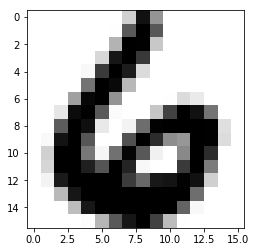

In [6]:
print(y_train[0])
plt.imshow(-X_train[0].reshape(16,16), 'gray')

# Define Helper Functions

In [7]:
def optimize_num_pc(model, X_train, y_train, X_test, y_test):
    
    num_feats = len(X_train[0, :])
    prec = []
    for m in range(2, num_feats):
        if m%50==0:
            print(m,'/',num_feats)
        pca = PCA(n_components=m)
        pca.fit(X_train)
        Z_train = pca.transform(X_train)
        Z_test = pca.transform(X_test)
        model.fit(X=Z_train, y=y_train)
        y_pred = model.predict(Z_test)
        prec.append([int(m), accuracy_score(y_test, y_pred)])
    
    prec = np.array(prec)
    m_maximizer = int(prec[prec[:, 1]==np.max(prec[:, 1])][0][0])
        
    return m_maximizer

# Start Gridsearch

In [8]:
Grid = namedtuple("Grid", ['model', 'param_grid'])

In [9]:
grids = [
    Grid(BaggingClassifier,
        {'estimator__n_estimators': [200, 400, 600, 800, 1000],
        'estimator__max_samples': [100, 250, 500, 750, 1000]}),
    Grid(RandomForestClassifier,
        {'estimator__max_depth': [70, 80, 90, 100, None],
         'estimator__max_features': ['auto', 'sqrt'],
         'estimator__n_estimators': [200, 400, 600, 800, 1000]}),
    Grid(GradientBoostingClassifier,
         {'max_depth':[3, 4, 5, 6], 
          'estimator__n_estimators':[100,250,500,750,1000]}),
    Grid(SVC, 
    {"estimator__C": [4, 8, 10, 12], 
     "estimator__degree":[3, 4, 5, 6]})
]

In [10]:
#prec = optimize_num_pc(LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test)

### Fit with 30 CV folds so the mean score is statistically significant

In [11]:
def perform_gridsearch(grid):

    print("Starting grid {}".format(str(grid)))
    model = OneVsRestClassifier(grid.model())
    gs = GridSearchCV(model, param_grid=grid.param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    res = {"Model" : grid.model, "Best Parameters" : gs.best_params_, "Accuracy" : gs.best_score_}
    print("Results from grid {}:".format(str(grid)))
    print(res)

In [12]:
for grid in grids:
    perform_gridsearch(grid)
print("All Processes Completed Successfully.")

Starting grid Grid(model=<class 'sklearn.ensemble.bagging.BaggingClassifier'>, param_grid={'estimator__n_estimators': [200, 400, 600, 800, 1000], 'estimator__max_samples': [100, 250, 500, 750, 1000]})
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 73.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 170.2min finished


Results from grid Grid(model=<class 'sklearn.ensemble.bagging.BaggingClassifier'>, param_grid={'estimator__n_estimators': [200, 400, 600, 800, 1000], 'estimator__max_samples': [100, 250, 500, 750, 1000]}):
{'Model': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'Best Parameters': {'estimator__max_samples': 1000, 'estimator__n_estimators': 400}, 'Accuracy': 0.8048278699766835}
Starting grid Grid(model=<class 'sklearn.ensemble.forest.RandomForestClassifier'>, param_grid={'estimator__max_depth': [70, 80, 90, 100, None], 'estimator__max_features': ['auto', 'sqrt'], 'estimator__n_estimators': [200, 400, 600, 800, 1000]})
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 55.9min finished


Results from grid Grid(model=<class 'sklearn.ensemble.forest.RandomForestClassifier'>, param_grid={'estimator__max_depth': [70, 80, 90, 100, None], 'estimator__max_features': ['auto', 'sqrt'], 'estimator__n_estimators': [200, 400, 600, 800, 1000]}):
{'Model': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Best Parameters': {'estimator__max_depth': 80, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 800}, 'Accuracy': 0.8771087642298725}
Starting grid Grid(model=<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, param_grid={'max_depth': [3, 4, 5, 6], 'estimator__n_estimators': [100, 250, 500, 750, 1000]})
Fitting 3 folds for each of 20 candidates, totalling 60 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000220FFAE6A50, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\olive\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\o...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000220FFAE6A50, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\olive\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\o...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...022086F03840>))>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...022086F03840>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x0000022086F03840>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x0000022086F03840>))
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x0000022086F03840>)
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 8, 6, 13, 28, 616448, tzinfo=tzutc()), 'msg_id': 'b5263b5a9aaf41cf83bfebe8e0d30cee', 'msg_type': 'execute_request', 'session': '1eef5d90d8754961b812a347a9f57f57', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b5263b5a9aaf41cf83bfebe8e0d30cee', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1eef5d90d8754961b812a347a9f57f57']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 8, 6, 13, 28, 616448, tzinfo=tzutc()), 'msg_id': 'b5263b5a9aaf41cf83bfebe8e0d30cee', 'msg_type': 'execute_request', 'session': '1eef5d90d8754961b812a347a9f57f57', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b5263b5a9aaf41cf83bfebe8e0d30cee', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1eef5d90d8754961b812a347a9f57f57'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 8, 6, 13, 28, 616448, tzinfo=tzutc()), 'msg_id': 'b5263b5a9aaf41cf83bfebe8e0d30cee', 'msg_type': 'execute_request', 'session': '1eef5d90d8754961b812a347a9f57f57', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b5263b5a9aaf41cf83bfebe8e0d30cee', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.For object>, <_ast.Expr object>], cell_name='<ipython-input-12-01df3446e5c1>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 22089bcecc0, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000022089C1E930, file "<ipython-input-12-01df3446e5c1>", line 1>
        result = <ExecutionResult object at 22089bcecc0, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000022089C1E930, file "<ipython-input-12-01df3446e5c1>", line 1>, result=<ExecutionResult object at 22089bcecc0, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000022089C1E930, file "<ipython-input-12-01df3446e5c1>", line 1>
        self.user_global_ns = {'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Grid': <class '__main__.Grid'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nimport numpy as np\nimport ma..._ipython().run_line_magic('matplotlib', 'inline')", 'from sklearn.svm import SVC\nfrom sklearn.multicl...er\nfrom sklearn.ensemble import BaggingClassifier', r'ziptrain = np.loadtxt(r"C:\Users\olive\Documents...nal-Applied-Statistics\Assignment 4\ziptest.csv")', 'X_train, X_test = ziptrain[:, 1:], ziptest[:, 1:]\ny_train, y_test = ziptrain[:, 0], ziptest[:, 0]', 'y_train = label_binarize(y_train, classes=[0, 1,...(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])', "print(y_train[0])\nplt.imshow(-X_train[0].reshape(16,16), 'gray')", 'def optimize_num_pc(model, X_train, y_train, X_t...ec[:, 1])][0][0])\n        \n    return m_maximizer', 'Grid = namedtuple("Grid", [\'model\', \'param_grid\'])', 'grids = [\n    Grid(BaggingClassifier,\n        {\'..., 12], \n     "estimator__degree":[3, 4, 5, 6]})\n]', '#prec = optimize_num_pc(LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test)', 'def perform_gridsearch(grid):\n\n    print("Starti... from grid {}:".format(str(grid)))\n    print(res)', 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")'], 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, 'OneVsRestClassifier': <class 'sklearn.multiclass.OneVsRestClassifier'>, 'Out': {6: <matplotlib.image.AxesImage object>}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Grid': <class '__main__.Grid'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nimport numpy as np\nimport ma..._ipython().run_line_magic('matplotlib', 'inline')", 'from sklearn.svm import SVC\nfrom sklearn.multicl...er\nfrom sklearn.ensemble import BaggingClassifier', r'ziptrain = np.loadtxt(r"C:\Users\olive\Documents...nal-Applied-Statistics\Assignment 4\ziptest.csv")', 'X_train, X_test = ziptrain[:, 1:], ziptest[:, 1:]\ny_train, y_test = ziptrain[:, 0], ziptest[:, 0]', 'y_train = label_binarize(y_train, classes=[0, 1,...(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])', "print(y_train[0])\nplt.imshow(-X_train[0].reshape(16,16), 'gray')", 'def optimize_num_pc(model, X_train, y_train, X_t...ec[:, 1])][0][0])\n        \n    return m_maximizer', 'Grid = namedtuple("Grid", [\'model\', \'param_grid\'])', 'grids = [\n    Grid(BaggingClassifier,\n        {\'..., 12], \n     "estimator__degree":[3, 4, 5, 6]})\n]', '#prec = optimize_num_pc(LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test)', 'def perform_gridsearch(grid):\n\n    print("Starti... from grid {}:".format(str(grid)))\n    print(res)', 'for grid in grids:\n    perform_gridsearch(grid)\nprint("All Processes Completed Successfully.")'], 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, 'OneVsRestClassifier': <class 'sklearn.multiclass.OneVsRestClassifier'>, 'Out': {6: <matplotlib.image.AxesImage object>}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\<ipython-input-12-01df3446e5c1> in <module>()
      1 for grid in grids:
----> 2     perform_gridsearch(grid)
      3 print("All Processes Completed Successfully.")

...........................................................................
C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\<ipython-input-11-31d6b81a3f91> in perform_gridsearch(grid=Grid(model=<class 'sklearn.ensemble.gradient_boo...ator__n_estimators': [100, 250, 500, 750, 1000]}))
      1 def perform_gridsearch(grid):
      2 
      3     print("Starting grid {}".format(str(grid)))
      4     model = OneVsRestClassifier(grid.model())
      5     gs = GridSearchCV(model, param_grid=grid.param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
----> 6     gs.fit(X_train, y_train)
      7     res = {"Model" : grid.model, "Best Parameters" : gs.best_params_, "Accuracy" : gs.best_score_}
      8     print("Results from grid {}:".format(str(grid)))
      9     print(res)

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...ore='warn',
       scoring='accuracy', verbose=1), X=array([[-1.   , -1.   , -1.   , ..., -1.   , -1.... , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]]), y=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]]), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X = array([[-1.   , -1.   , -1.   , ..., -1.   , -1.... , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])
        y = array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Dec  8 05:05:16 2018
PID: 13188Python 3.6.5: C:\Users\olive\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (OneVsRestClassifier(estimator=GradientBoostingCl...           warm_start=False),
          n_jobs=1), memmap([[-1.   , -1.   , -1.   , ..., -1.   , -1... , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]]), {'score': make_scorer(accuracy_score)}, array([2431, 2432, 2433, ..., 7288, 7289, 7290]), array([   0,    1,    2, ..., 2428, 2429, 2430]), 1, {'estimator__n_estimators': 100, 'max_depth': 3}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (OneVsRestClassifier(estimator=GradientBoostingCl...           warm_start=False),
          n_jobs=1), memmap([[-1.   , -1.   , -1.   , ..., -1.   , -1... , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]]), {'score': make_scorer(accuracy_score)}, array([2431, 2432, 2433, ..., 7288, 7289, 7290]), array([   0,    1,    2, ..., 2428, 2429, 2430]), 1, {'estimator__n_estimators': 100, 'max_depth': 3})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=OneVsRestClassifier(estimator=GradientBoostingCl...           warm_start=False),
          n_jobs=1), X=memmap([[-1.   , -1.   , -1.   , ..., -1.   , -1... , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]]), y=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]]), scorer={'score': make_scorer(accuracy_score)}, train=array([2431, 2432, 2433, ..., 7288, 7289, 7290]), test=array([   0,    1,    2, ..., 2428, 2429, 2430]), verbose=1, parameters={'estimator__n_estimators': 100, 'max_depth': 3}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of OneVsR...          warm_start=False),
          n_jobs=1)>
        parameters = {'estimator__n_estimators': 100, 'max_depth': 3}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\olive\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py in set_params(self=OneVsRestClassifier(estimator=GradientBoostingCl...           warm_start=False),
          n_jobs=1), **params={'estimator__n_estimators': 100, 'max_depth': 3})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'max_depth'
        self = OneVsRestClassifier(estimator=GradientBoostingCl...           warm_start=False),
          n_jobs=1)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter max_depth for estimator OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          n_jobs=1). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________